In [150]:
# Create an new csv document with only dataset from Department of Transportation by Pandas
import csv
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt 
import pandas as pd


T_df=pd.read_csv('Employee_Salaries_-_2019.csv')

filt=T_df['Department'].str.contains('DOT',na=False)
w_df=T_df.loc[filt] #filter the Department that is transportation


w_df.to_csv('transportation.csv', index=False)


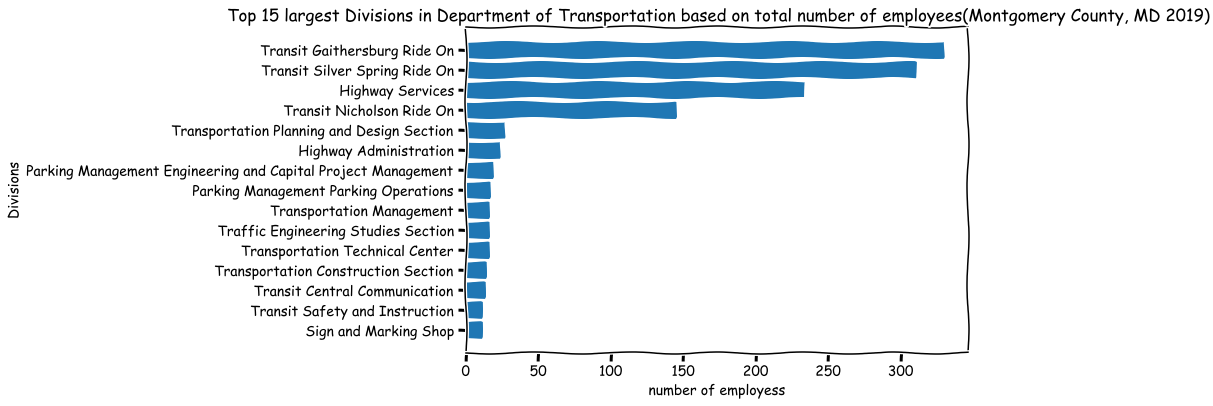

In [151]:
# 1. Top 5 largest Divisions in Department of Transportation based on number of employees.
plt.xkcd()

with open('transportation.csv') as csv_file:
    csv_reader=csv.DictReader(csv_file)#read csv
    
    dep_counter=Counter()
    
    for row in csv_reader:
        dep_counter.update(row['Division'].split(';'))

Department=[]
num_people=[]

for item in dep_counter.most_common(15):#top 5 departments
    Department.append(item[0])
    num_people.append(item[1])

Department.reverse() # from largest to lowest 
num_people.reverse()
plt.figure(figsize=(9,6))
plt.barh(Department,num_people)# add h to bar 

plt.title('Top 15 largest Divisions in Department of Transportation based on total number of employees(Montgomery County, MD 2019)')
plt.ylabel('Divisions')
plt.xlabel('number of employess')
plt.savefig('all divsion',bbox_inches = 'tight')

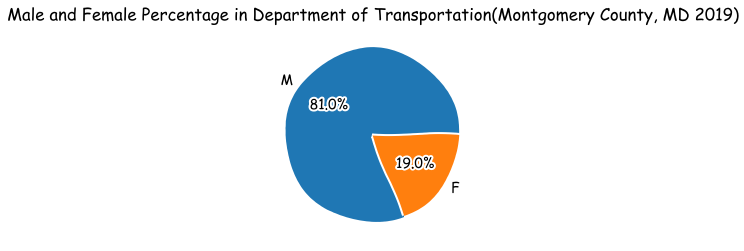

In [152]:
# 2. Male and Female Percentages in Department of Transportation.
plt.xkcd()

with open('transportation.csv') as csv_file:
    csv_reader=csv.DictReader(csv_file)#read csv
    
    gen_counter=Counter()
    
    for row in csv_reader:
        gen_counter.update(row['Gender'].split(';'))#the way to divide them

gender=[]
num_people=[]

for item in gen_counter.most_common(5): 
    gender.append(item[0])
    num_people.append(item[1])


plt.pie(num_people, labels=gender,autopct='%1.1f%%')
plt.title('Male and Female Percentage in Department of Transportation(Montgomery County, MD 2019)')
plt.savefig('workers percentage',bbox_inches = 'tight')

In [153]:
3. # Create Female workers only csv
plt.xkcd()

df=pd.read_csv('transportation.csv')

f_df=df[df['Gender']=='F'] #filter out the female
f_df.to_csv('Female_workers.csv', index=False)


In [154]:

with open('Female_workers.csv') as csv_file:
    csv_reader=csv.DictReader(csv_file)#read csv
    
    gen_counter=Counter()
 
    
    for row in csv_reader:
        gen_counter.update(row['Division'].split(';'))

division=[]
num_people=[]

for item in gen_counter.most_common(10): 
    division.append(item[0])
    num_people.append(item[1])


In [155]:
# Create Male workers only csv
plt.xkcd()

df=pd.read_csv('transportation.csv')

f_df=df[df['Gender']=='M'] 
f_df.to_csv('Male_workers.csv', index=False)

['Transportation Management', 'Traffic Engineering Studies Section', 'Transportation Technical Center', 'Transportation Planning and Design Section', 'Parking Management Engineering and Capital Project Management', 'Highway Administration', 'Transit Nicholson Ride On', 'Highway Services', 'Transit Silver Spring Ride On', 'Transit Gaithersburg Ride On'] [13, 15, 16, 18, 19, 23, 112, 218, 263, 266]


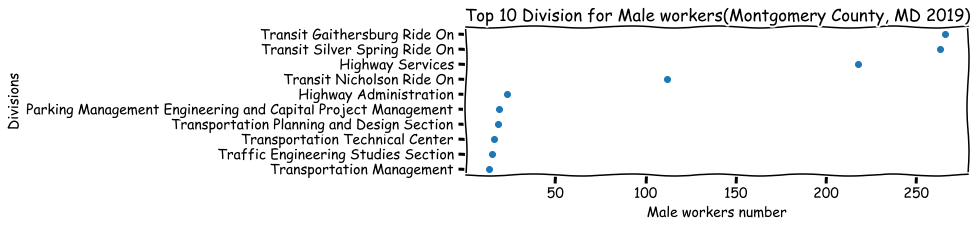

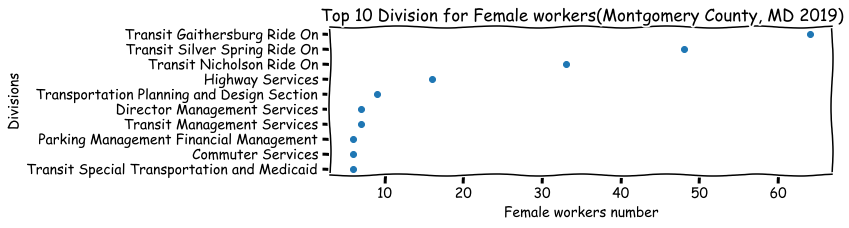

In [156]:
with open('Male_workers.csv') as csv_file:
    csv_reader=csv.DictReader(csv_file)#read csv
    
    m_counter=Counter()
 
    
    for row in csv_reader:
        m_counter.update(row['Division'].split(';'))
m_division=[]
m_num_people=[]

for item in m_counter.most_common(10): 
    m_division.append(item[0])
    m_num_people.append(item[1])
    
m_division.reverse()
m_num_people.reverse()

plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.scatter(m_num_people, m_division)
plt.title('Top 10 Division for Male workers(Montgomery County, MD 2019)')
plt.ylabel('Divisions')
plt.xlabel('Male workers number')
plt.savefig('m_d',bbox_inches = 'tight')


division.reverse()
num_people.reverse()
plt.figure(figsize=(9,6))
plt.subplot(2,1,2)
plt.scatter(num_people,division)
plt.title('Top 10 Division for Female workers(Montgomery County, MD 2019)')
plt.ylabel('Divisions')
plt.xlabel('Female workers number')
plt.savefig('F_d',bbox_inches = 'tight')
print(m_division,m_num_people)



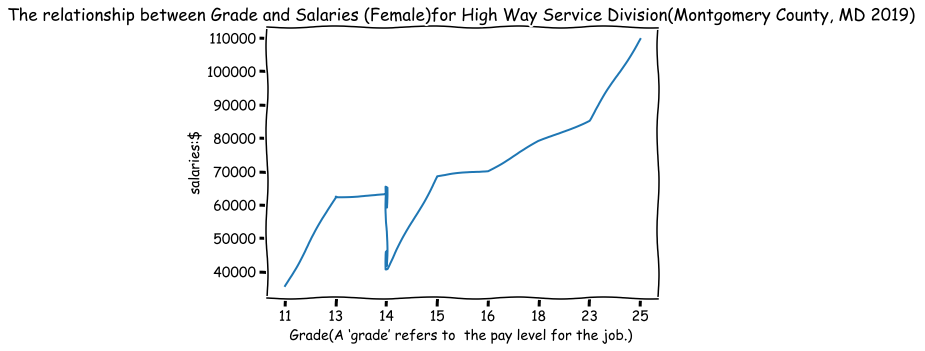

In [157]:
#4. The relationship between Grade and Salaries (Female)for High Way Service Division  
plt.xkcd()
f=pd.read_csv('transportation.csv')
 # print out, the leftest numbers are indices for the row 
High=f[(f.Division=='Highway Services')& (f.Gender=='F')]
High_new=High.rename(columns={'Base Salary':'Base_Salary'}).sort_values(by='Grade')
plt.figure(figsize=(7,5))
plt.plot(High_new.Grade, High_new.Base_Salary)
plt.title('The relationship between Grade and Salaries (Female)for High Way Service Division(Montgomery County, MD 2019) ')
plt.xlabel('Grade(A ‘grade’ refers to  the pay level for the job.) ')
plt.ylabel('salaries:$')
plt.savefig('grade', bbox_inches = 'tight')


In [158]:
#5 male and female overtime percentage respectl
m=pd.read_csv('Male_workers.csv')
a_m=m.rename(columns={'Base Salary':'Base_Salary','2019 Overtime Pay':'2019_Overtime_Pay'})
all_men=len(a_m.Division) # total male workers

#print(all_men)

om=a_m[a_m['2019_Overtime_Pay']>=1]
overtime_man=len(om.Division) 


#print(overtime_man)

f=pd.read_csv('Female_workers.csv')
a_f=f.rename(columns={'Base Salary':'Base_Salary','2019 Overtime Pay':'2019_Overtime_Pay'})
all_female=len(a_f.Division) #total female workers 
#print(all_female)

fm=a_f[a_f['2019_Overtime_Pay']>=1]
overtime_female=len(fm.Division) 

#print(overtime_female)




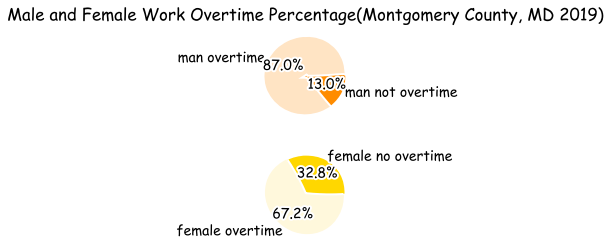

In [159]:

slices=[overtime_man,all_men-overtime_man]
labels=['man overtime','man not overtime']
colorsm=['bisque','darkorange']

plt.subplot(2,1,1)

plt.pie(slices, labels=labels,autopct='%1.1f%%',colors=colorsm)
plt.title('Male and Female Work Overtime Percentage(Montgomery County, MD 2019)')
#plt.savefig('overtime percentage1',bbox_inches = 'tight')


f_slices=[all_female-overtime_female,overtime_female]
f_labels=['female no overtime','female overtime']
colorsf=['gold','cornsilk']
plt.subplot(2,1,2)

plt.pie(f_slices, labels=f_labels,autopct='%1.1f%%',colors=colorsf)
plt.savefig('Male and Female overtime percentage2',bbox_inches = 'tight')